In [1]:
import numpy as np
import requests
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Crawling data using BeautifulSoup package

Select URLs

In [2]:
url_lists = []
for year in range(1950, 2007):
  next_year_str = str(year + 1)
  url = "http://www.rsssf.com/engpaul/FLA/" + str(year) + "-" + next_year_str[-2:] + ".html"
  url_lists.append(url)
  print(url)

http://www.rsssf.com/engpaul/FLA/1950-51.html
http://www.rsssf.com/engpaul/FLA/1951-52.html
http://www.rsssf.com/engpaul/FLA/1952-53.html
http://www.rsssf.com/engpaul/FLA/1953-54.html
http://www.rsssf.com/engpaul/FLA/1954-55.html
http://www.rsssf.com/engpaul/FLA/1955-56.html
http://www.rsssf.com/engpaul/FLA/1956-57.html
http://www.rsssf.com/engpaul/FLA/1957-58.html
http://www.rsssf.com/engpaul/FLA/1958-59.html
http://www.rsssf.com/engpaul/FLA/1959-60.html
http://www.rsssf.com/engpaul/FLA/1960-61.html
http://www.rsssf.com/engpaul/FLA/1961-62.html
http://www.rsssf.com/engpaul/FLA/1962-63.html
http://www.rsssf.com/engpaul/FLA/1963-64.html
http://www.rsssf.com/engpaul/FLA/1964-65.html
http://www.rsssf.com/engpaul/FLA/1965-66.html
http://www.rsssf.com/engpaul/FLA/1966-67.html
http://www.rsssf.com/engpaul/FLA/1967-68.html
http://www.rsssf.com/engpaul/FLA/1968-69.html
http://www.rsssf.com/engpaul/FLA/1969-70.html
http://www.rsssf.com/engpaul/FLA/1970-71.html
http://www.rsssf.com/engpaul/FLA/1

Download Dataset

In [3]:
# Download football league data from selected URLs
def download_data(url_lists):
  for url in url_lists:
    print(url)
    r = requests.get(url)
    soup = BeautifulSoup(r.content, 'html.parser')
    x = str(soup)
    data = x.split("\n")
    num = 0
    for each in data:
      if num == 20:
        break
      if each.strip() != '':
        if each.strip()[0].isnumeric():
        #print(each)
        
          team1="" 
          spi = each.strip().split(" ")
  
          pt=[]
          for each in spi:
            if each.isnumeric():
              pt.append(each.strip())
            

          if len(pt) >= 12:
            try:
              team1 = spi[1]
              team1 += ' '+spi[2]
              if not spi[3].isnumeric():
                team1 += ' '+spi[3]

              Team.append(team1.strip()) 
              MP.append(int(pt[0]))

              Win_Home.append(int(pt[1]))
              Draw_Home.append(int(pt[2]))
              Lost_Home.append(int(pt[3]))
              GF_Home.append(int(pt[4]))
              GA_Home.append(int(pt[5]))

              Win_Away.append(int(pt[6]))
              Draw_Away.append(int(pt[7]))
              Lost_Away.append(int(pt[8]))
              GF_Away.append(int(pt[9]))
              GA_Away.append(int(pt[10]))

              Win.append(int(pt[1]) + int(pt[6]))
              Draw.append(int(pt[2]) + int(pt[7]))
              Lost.append(int(pt[3]) + int(pt[8]))
              GF.append(int(pt[4]) + int(pt[9]))
              GA.append(int(pt[5]) + int(pt[10]))

              Pts.append(int(pt[11]))
              Place.append(int(spi[0].replace(".", "")))
              num = num + 1
            except:
              pass

In [4]:
# Initialize variables
Team = []
MP = []
Win_Home = []
Draw_Home = []
Lost_Home = []
GF_Home = []
GA_Home = []

Win_Away = []
Draw_Away = []
Lost_Away = []
GF_Away = []
GA_Away = []

Win = []
Draw = []
Lost = []
GF = []
GA = []

Pts = []
Place = []

download_data(url_lists)

http://www.rsssf.com/engpaul/FLA/1950-51.html
http://www.rsssf.com/engpaul/FLA/1951-52.html
http://www.rsssf.com/engpaul/FLA/1952-53.html
http://www.rsssf.com/engpaul/FLA/1953-54.html
http://www.rsssf.com/engpaul/FLA/1954-55.html
http://www.rsssf.com/engpaul/FLA/1955-56.html
http://www.rsssf.com/engpaul/FLA/1956-57.html
http://www.rsssf.com/engpaul/FLA/1957-58.html
http://www.rsssf.com/engpaul/FLA/1958-59.html
http://www.rsssf.com/engpaul/FLA/1959-60.html
http://www.rsssf.com/engpaul/FLA/1960-61.html
http://www.rsssf.com/engpaul/FLA/1961-62.html
http://www.rsssf.com/engpaul/FLA/1962-63.html
http://www.rsssf.com/engpaul/FLA/1963-64.html
http://www.rsssf.com/engpaul/FLA/1964-65.html
http://www.rsssf.com/engpaul/FLA/1965-66.html
http://www.rsssf.com/engpaul/FLA/1966-67.html
http://www.rsssf.com/engpaul/FLA/1967-68.html
http://www.rsssf.com/engpaul/FLA/1968-69.html
http://www.rsssf.com/engpaul/FLA/1969-70.html
http://www.rsssf.com/engpaul/FLA/1970-71.html
http://www.rsssf.com/engpaul/FLA/1

In [5]:
print(len(Win_Home))
print(len(Pts))
print(len(Place))

1140
1140
1140


In [6]:
#Converting into dataframe
import pandas as pd
df = pd.DataFrame(
    {'Team': Team,'MP': MP,
     'Win_Home': Win_Home,'Draw_Home': Draw_Home,'Lost_Home': Lost_Home,'GF_Home': GF_Home,'GA_Home': GA_Home,
     'Win_Away': Win_Away,'Draw_Away': Draw_Away,'Lost_Away': Lost_Away,'GF_Away': GF_Away,'GA_Away': GA_Away,
     'Points':Pts, 'Place':Place,
    })
df

,Team,MP,Win_Home,Draw_Home,Lost_Home,GF_Home,GA_Home,Win_Away,Draw_Away,Lost_Away,GF_Away,GA_Away,Points,Place
0,TOTTENHAM HOTSPUR,42,17,2,2,54,21,8,8,5,28,23,60,1
1,Manchester United,42,14,4,3,42,16,10,4,7,32,24,56,2
2,Blackpool,42,12,6,3,43,19,8,4,9,36,34,50,3
3,Newcastle United,42,10,6,5,36,22,8,7,6,26,31,49,4
4,Arsenal,42,11,5,5,47,28,8,4,9,26,28,47,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,Fulham,38,7,7,5,18,18,1,8,10,20,42,39,16
1136,Wigan Athletic,38,5,4,10,18,30,5,4,10,19,29,38,17
1137,SHEFFIELD UNITED,38,7,6,6,24,21,3,2,14,8,34,38,18
1138,CHARLTON ATHLETIC,38,7,5,7,19,20,1,5,13,15,40,34,19


In [7]:
df_visual = pd.DataFrame(
    {'Team': Team,'Win': Win,'Draw': Draw_Home,'Lost':Lost,
     'GF':GF,'GA':GA,'Points':Pts, 'Place':Place})
df_visual

,Team,Win,Draw,Lost,GF,GA,Points,Place
0,TOTTENHAM HOTSPUR,25,2,7,82,44,60,1
1,Manchester United,24,4,10,74,40,56,2
2,Blackpool,20,6,12,79,53,50,3
3,Newcastle United,18,6,11,62,53,49,4
4,Arsenal,19,5,14,73,56,47,5
...,...,...,...,...,...,...,...,...
1135,Fulham,8,7,15,38,60,39,16
1136,Wigan Athletic,10,4,20,37,59,38,17
1137,SHEFFIELD UNITED,10,6,20,32,55,38,18
1138,CHARLTON ATHLETIC,8,5,20,34,60,34,19


In [8]:
# Initialize variables
Team = []
MP = []
Win_Home = []
Draw_Home = []
Lost_Home = []
GF_Home = []
GA_Home = []

Win_Away = []
Draw_Away = []
Lost_Away = []
GF_Away = []
GA_Away = []

Win = []
Draw = []
Lost = []
GF = []
GA = []

Pts = []
Place = []

download_data(['http://www.rsssf.com/engpaul/FLA/2007-08.html'])

http://www.rsssf.com/engpaul/FLA/2007-08.html


In [9]:
#Converting into dataframe
import pandas as pd
df_test = pd.DataFrame(
    {'Team': Team,'MP': MP,
     'Win_Home': Win_Home,'Draw_Home': Draw_Home,'Lost_Home': Lost_Home,'GF_Home': GF_Home,'GA_Home': GA_Home,
     'Win_Away': Win_Away,'Draw_Away': Draw_Away,'Lost_Away': Lost_Away,'GF_Away': GF_Away,'GA_Away': GA_Away,
     'GF': GF, 'Points':Pts, 'Place':Place,
    })
df_test

,Team,MP,Win_Home,Draw_Home,Lost_Home,GF_Home,GA_Home,Win_Away,Draw_Away,Lost_Away,GF_Away,GA_Away,GF,Points,Place
0,Manchester United,38,17,1,1,47,7,10,5,4,33,15,80,58,1
1,Chelsea,38,12,7,0,36,13,13,3,3,29,13,65,39,2
2,Arsenal,38,14,5,0,37,11,10,6,3,37,20,74,43,3
3,Liverpool,38,12,6,1,43,13,9,7,3,24,15,67,39,4
4,Everton,38,11,4,4,34,17,8,4,7,21,16,55,22,5
5,Aston Villa,38,10,3,6,34,22,6,9,4,37,29,71,20,6
6,Blackburn Rovers,38,8,7,4,26,19,7,6,6,24,29,50,2,7
7,Portsmouth,38,7,8,4,24,14,9,1,9,24,26,48,8,8
8,Manchester City,38,11,4,4,28,20,4,6,9,17,33,45,55,9
9,West Ham United,38,7,7,5,24,24,6,3,10,18,26,42,49,10


In [10]:
df_test_visual = pd.DataFrame(
    {'Team': Team,'Win': Win,'Draw': Draw_Home,'Lost':Lost,
     'GF':GF,'GA':GA,'Points':Pts, 'Place':Place})
df_test_visual

,Team,Win,Draw,Lost,GF,GA,Points,Place
0,Manchester United,27,1,5,80,22,58,1
1,Chelsea,25,7,3,65,26,39,2
2,Arsenal,24,5,3,74,31,43,3
3,Liverpool,21,6,4,67,28,39,4
4,Everton,19,4,11,55,33,22,5
5,Aston Villa,16,3,10,71,51,20,6
6,Blackburn Rovers,15,7,10,50,48,2,7
7,Portsmouth,16,8,13,48,40,8,8
8,Manchester City,15,4,13,45,53,55,9
9,West Ham United,13,7,15,42,50,49,10


# Pre-processing

Number of teams

In [11]:
print('Number of teams:', len(df['Team'].unique()))

Number of teams: 100


In [12]:
# Remove null values
df =df.dropna()

#Applying encoding
df_team= df["Team"]
df_team = df_team.astype('category')
df_team = df_team.cat.codes
df.insert(0, 'TeamID', df_team)

df.head(10)

,TeamID,Team,MP,Win_Home,Draw_Home,Lost_Home,GF_Home,GA_Home,Win_Away,Draw_Away,Lost_Away,GF_Away,GA_Away,Points,Place
0,83,TOTTENHAM HOTSPUR,42,17,2,2,54,21,8,8,5,28,23,60,1
1,53,Manchester United,42,14,4,3,42,16,10,4,7,32,24,56,2
2,16,Blackpool,42,12,6,3,43,19,8,4,9,36,34,50,3
3,59,Newcastle United,42,10,6,5,36,22,8,7,6,26,31,49,4
4,5,Arsenal,42,11,5,5,47,28,8,4,9,26,28,47,5
5,54,Middlesbrough,42,12,7,2,51,25,6,4,11,25,40,47,6
6,66,Portsmouth,42,8,10,3,39,30,8,5,8,32,38,47,7
7,17,Bolton Wanderers,42,11,2,8,31,20,8,5,8,33,41,45,8
8,46,Liverpool,42,11,5,5,28,25,5,6,10,25,34,43,9
9,21,Burnley,42,9,7,5,27,16,5,7,9,21,27,42,10


In [13]:
#EDA
df.describe()

,TeamID,MP,Win_Home,Draw_Home,Lost_Home,GF_Home,GA_Home,Win_Away,Draw_Away,Lost_Away,GF_Away,GA_Away,Points,Place
count,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000
mean,49.872807,39.833333,11.439474,5.435965,4.868421,34.489474,23.376316,5.885088,5.395614,9.611404,23.442982,33.721930,45.474561,10.500000
std,27.527440,6.063632,6.321280,2.252367,2.292152,11.370328,7.046413,4.002846,2.032350,3.015158,7.668465,9.816975,13.426033,5.768812
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,4.000000,8.000000,0.000000,1.000000
25%,29.000000,38.000000,8.000000,4.000000,3.000000,27.750000,18.000000,4.000000,4.000000,8.000000,18.000000,27.000000,38.000000,5.750000
50%,47.000000,42.000000,10.000000,5.000000,5.000000,34.000000,23.000000,5.000000,5.000000,10.000000,23.000000,33.000000,44.000000,10.500000
75%,77.000000,42.000000,13.000000,7.000000,6.000000,42.000000,28.000000,7.000000,7.000000,12.000000,28.000000,40.000000,52.000000,15.250000
max,99.000000,42.000000,42.000000,17.000000,14.000000,72.000000,54.000000,33.000000,13.000000,18.000000,50.000000,71.000000,92.000000,20.000000


In [14]:
dfx = df_visual.groupby('Team').sum()
print(len(dfx))

100


In [15]:
df10 = dfx.nlargest(10, 'Win')
df10

,Win,Draw,Lost,GF,GA,Points,Place
Team,,,,,,,
Arsenal,1015,277,613,3200,2596,2541,345
Tottenham Hotspur,942,249,717,3203,2932,2380,434
Everton,841,280,695,2701,2642,2295,496
Chelsea,832,226,553,2646,2380,1987,387
Manchester United,816,215,465,2816,2134,2115,250
Liverpool,742,183,366,2053,1515,1720,164
Aston Villa,734,225,632,2345,2406,1893,449
Newcastle United,686,216,589,2332,2389,1652,417
Leeds United,632,156,348,1758,1421,1416,210


# Top wins by the team

<AxesSubplot:xlabel='Team'>

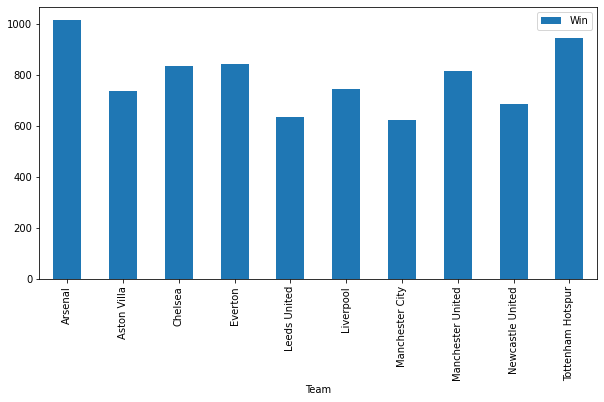

In [16]:
df10[['Win']].groupby(['Team']).sum().plot.bar(figsize=(10, 5))

# Top loss by team

<AxesSubplot:xlabel='Team'>

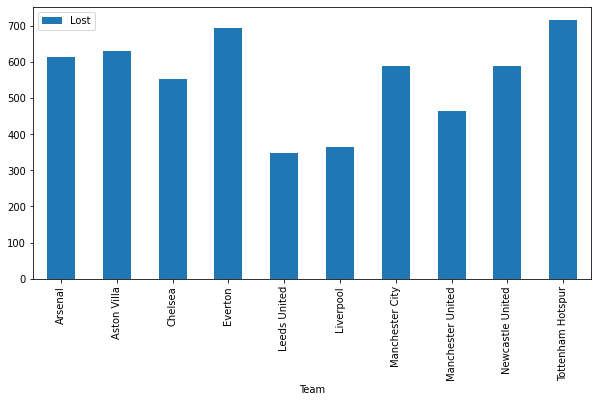

In [17]:
df10[['Lost']].groupby(['Team']).sum().plot.bar(figsize=(10, 5))

# Top goal-for by team

<AxesSubplot:xlabel='Team'>

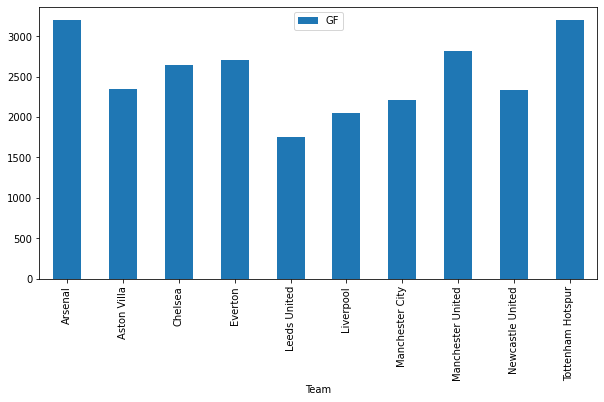

In [18]:
df10[['GF']].groupby(['Team']).sum().plot.bar(figsize=(10, 5))

# Top goals against by team

<AxesSubplot:xlabel='Team'>

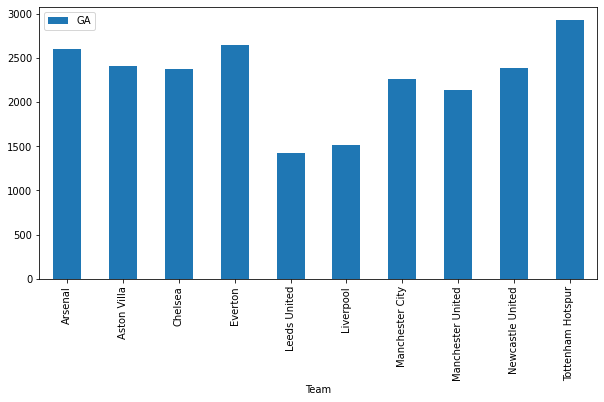

In [19]:
df10[['GA']].groupby(['Team']).sum().plot.bar(figsize=(10, 5))

# Top total points by team

<AxesSubplot:xlabel='Team'>

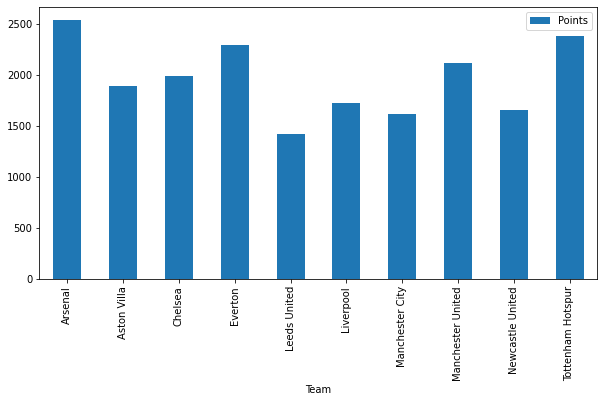

In [20]:
df10[['Points']].groupby(['Team']).sum().plot.bar(figsize=(10, 5))

# Splitting the data to make it the test and train

As we are going to predict the coninuous variables
So we will use linear regression, So we have 3 predictions to make.

In [21]:
X = df[['Win_Home','Draw_Home','Lost_Home','GF_Home','GA_Home','Win_Away','Draw_Away','Lost_Away','GF_Away','GA_Away','Points']]
y = df['Place']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

X_current = df_test[['Win_Home','Draw_Home','Lost_Home','GF_Home','GA_Home','Win_Away','Draw_Away','Lost_Away','GF_Away','GA_Away','Points']]
y_current = df_test["Place"]

# Using decision Tree

In [22]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_current)

df_test['Prediction'] = y_pred
df_test

,Team,MP,Win_Home,Draw_Home,Lost_Home,GF_Home,GA_Home,Win_Away,Draw_Away,Lost_Away,GF_Away,GA_Away,GF,Points,Place,Prediction
0,Manchester United,38,17,1,1,47,7,10,5,4,33,15,80,58,1,1
1,Chelsea,38,12,7,0,36,13,13,3,3,29,13,65,39,2,2
2,Arsenal,38,14,5,0,37,11,10,6,3,37,20,74,43,3,2
3,Liverpool,38,12,6,1,43,13,9,7,3,24,15,67,39,4,2
4,Everton,38,11,4,4,34,17,8,4,7,21,16,55,22,5,4
5,Aston Villa,38,10,3,6,34,22,6,9,4,37,29,71,20,6,6
6,Blackburn Rovers,38,8,7,4,26,19,7,6,6,24,29,50,2,7,6
7,Portsmouth,38,7,8,4,24,14,9,1,9,24,26,48,8,8,6
8,Manchester City,38,11,4,4,28,20,4,6,9,17,33,45,55,9,11
9,West Ham United,38,7,7,5,24,24,6,3,10,18,26,42,49,10,10


# Test Accuracy and variance between prediction and real places

In [23]:
# get test accuracy
acc = clf.score(X_test, y_test)
print('Test Accuracy:', acc)

# compute variance
x = df_test['Prediction']
y = df_test['Place']

dist = np.sqrt(np.mean([(a - b)**2 for (a, b) in zip(x, y)]))
print('Average difference:', dist)

Test Accuracy: 0.19298245614035087
Average difference: 2.6457513110645907


## Confusion matirx

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
disp = confusion_matrix(y_test, y_pred)
print(disp)

[[9 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 3 2 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 4 2 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 5 1 3 2 0 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 1 3 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 2 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 1 1 1 3 2 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 2 0 4 1 1 1 1 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 4 2 3 2 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 1 0 6 1 2 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 4 4 2 2 1 2 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 1 2 0 0 2 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 2 2 0 1 2 2 1 2 2 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 1 1 1 1 2 2 1 1 0 0]
 [0 0 0 0 0 0 2 0 0 0 3 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 0 3 3 2 2 2 0]
 [0 0 0 0 0 0 1 0 0 0 2 0 0 2 1 2 0 1 1 1]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 5 0 0 3 4 3]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 2 1 6]]


# Classification report for the season winner model




In [25]:
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.75      0.75      0.75        12
           2       0.33      0.33      0.33         9
           3       0.17      0.33      0.22         6
           4       0.17      0.17      0.17        12
           5       0.08      0.07      0.07        15
           6       0.00      0.00      0.00         9
           7       0.07      0.17      0.10         6
           8       0.17      0.10      0.12        10
           9       0.10      0.08      0.09        12
          10       0.18      0.33      0.24        12
          11       0.06      0.08      0.07        13
          12       0.17      0.12      0.14        17
          13       0.00      0.00      0.00         8
          14       0.25      0.13      0.17        15
          15       0.12      0.18      0.15        11
          16       0.00      0.00      0.00         7
          17       0.25      0.13      0.17        15
          18       0.10    

[0.22807018 0.23684211 0.21491228 0.14473684 0.14473684]


Text(0.5, 1.0, 'Validation Accuracy')

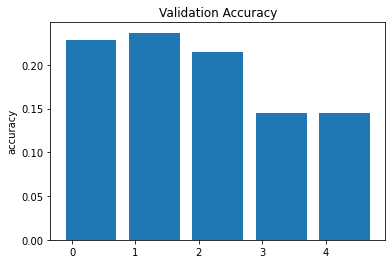

In [26]:
from sklearn.model_selection import cross_val_score
X =df[['Win_Home','Draw_Home','Lost_Home','GF_Home','GA_Home','Win_Away','Draw_Away','Lost_Away','GF_Away','GA_Away','Points']]
y = df["Place"]

scores = cross_val_score(estimator=clf, X=X, y=y, cv = 5, n_jobs = 4)
index = np.arange(5) + 0.3
print(scores)
plt.bar(index, scores)
plt.ylabel("accuracy")
plt.title('Validation Accuracy')

In [27]:
#Which team will score more goals
X = df[['Win_Home','Draw_Home','Lost_Home','Win_Away','Draw_Away','Lost_Away']]
y = df_visual["GF"]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

X_current = df_test[['Win_Home','Draw_Home','Lost_Home','Win_Away','Draw_Away','Lost_Away']]
y_current = df_test_visual["GF"]


# Predicting the highest score

In [28]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_current)
df_goal = df_test[['Team', 'GF']]
df_goal['Pred_GF'] = y_pred
df_goal

,Team,GF,Pred_GF
0,Manchester United,80,72
1,Chelsea,65,72
2,Arsenal,74,80
3,Liverpool,67,76
4,Everton,55,57
5,Aston Villa,71,55
6,Blackburn Rovers,50,60
7,Portsmouth,48,61
8,Manchester City,45,49
9,West Ham United,42,64


Predict which team will score the most goals in current season.

In [29]:
#Goals prediction for the highest GF 
res = df_goal[df_goal['Pred_GF'] == max(df_goal['Pred_GF'])].head(1)
print(res)


      Team  GF  Pred_GF
2  Arsenal  74       80


In [30]:
print("The team will score most is which is predicted is: ",str(res['Team']))

The team will score most is which is predicted is:  2    Arsenal
Name: Team, dtype: object


# Validation for the predictions of highest goals

[0.02192982 0.02631579 0.03508772 0.02192982 0.01754386]


Text(0.5, 1.0, 'Validation Accuracy')

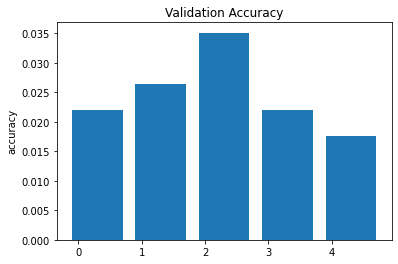

In [31]:
from sklearn.model_selection import cross_val_score
X = df[['Win_Home','Draw_Home','Lost_Home','Win_Away','Draw_Away','Lost_Away']]
y = df_visual["GF"]

scores = cross_val_score(estimator=clf, X=X, y=y, cv = 5, n_jobs = 4)
index = np.arange(5) + 0.3
print(scores)
plt.bar(index, scores)
plt.ylabel("accuracy")
plt.title('Validation Accuracy')

# Penalties data

In [32]:
#!pip install cloudscraper
import cloudscraper
scraper = cloudscraper.create_scraper()  # returns a CloudScraper instance
# Or: scraper = cloudscraper.CloudScraper()  
x = scraper.get("https://www.myfootballfacts.com/premier-league/all-time-premier-league/premier-league-penalty-statistics/").text
#print(x)
teams=["Chelsea","West Ham United",
       "Leeds United","Arsenal","Everton",
       "Manchester City","Brighton & Hove Albion","Manchester United","Crystal Palace","Brentford","Southampton","Liverpool","Norwich City",
       "Aston  Villa","Watford","Tottenham","Hotspur","Leicester City","Newcastle United","Wolverhampton Wanderers","Burnley"]

page_content = BeautifulSoup(x, "html.parser")
tbod = page_content.find('tbody').get_text()
tbod
# result = soup.select('tbody.tr.row1.odd')
# result
type(tbod)
tbod = tbod.split('\n')
clean_list = []
for each in tbod:
  clean_list.append(each.replace('\xa0',''))
data = clean_list[424:len(clean_list)]
list1 = ["Premier League Penalties 2019-20"]
i=-1
location=[]
for each in data:
  i=i+1
  if each in teams:
    #print(each)
    location.append(i)
Team=[]
For=[]
Against=[]	
Home=[]	
Away=[]
Scored=[]
Missed=[]	
Saved=[]
for each in location:
  if data[each].strip() != '' and data[each+1].strip() != '' and data[each+2].strip() != '' and data[each+3].strip() != '' and data[each+4].strip() != '' and data[each+5].strip():
    Team.append(data[each].strip())
    For.append(int(data[each+1]))
    Against.append(int(data[each+2]))
    Home.append(int(data[each+3]))
    Away.append(int(data[each+4]))
    Scored.append(int(data[each+5]))
    Missed.append(int(data[each+6]))
    Saved.append(int(data[each+7]))


In [33]:
#Converting into dataframe
import pandas as pd
df = pd.DataFrame(
    {'Team': Team, 'For': For,
     'Against': Against, 'Home': Home,
     'Away': Away, 'Scored':Scored     
    })
df

,Team,For,Against,Home,Away,Scored
0,Chelsea,7,4,4,3,7
1,West Ham United,5,2,2,3,3
2,Leeds United,4,3,3,1,4
3,Arsenal,4,3,3,1,1
4,Brighton & Hove Albion,4,3,4,0,3
...,...,...,...,...,...,...
124,Arsenal,5,6,4,1,4
125,Newcastle United,4,4,3,1,4
126,West Ham United,4,2,4,0,4
127,Southampton,3,5,1,2,3


In [34]:
#Drop NA
df = df.dropna()
df

,Team,For,Against,Home,Away,Scored
0,Chelsea,7,4,4,3,7
1,West Ham United,5,2,2,3,3
2,Leeds United,4,3,3,1,4
3,Arsenal,4,3,3,1,1
4,Brighton & Hove Albion,4,3,4,0,3
...,...,...,...,...,...,...
124,Arsenal,5,6,4,1,4
125,Newcastle United,4,4,3,1,4
126,West Ham United,4,2,4,0,4
127,Southampton,3,5,1,2,3


# Most goals by the team

<AxesSubplot:xlabel='Team'>

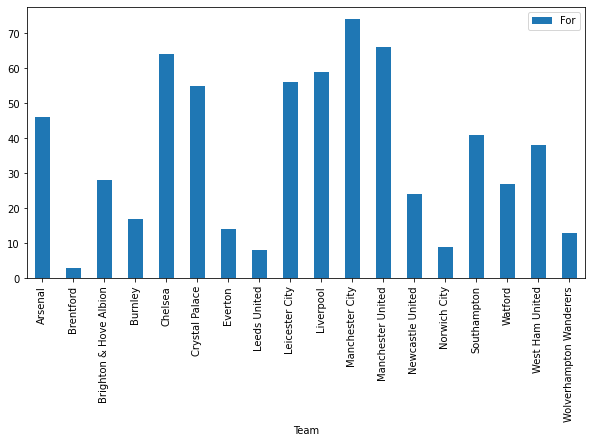

In [35]:
df[['Team','For']].groupby(['Team']).sum(['For']).plot(kind="bar",figsize=(10,5))

# Most scored by the teams

<AxesSubplot:xlabel='Team'>

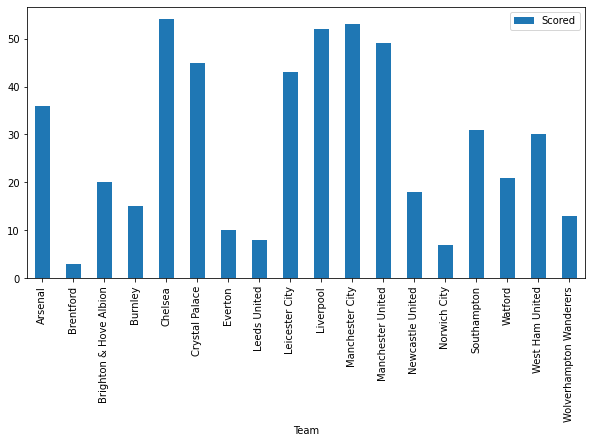

In [36]:
df[['Team','Scored']].groupby(['Team']).sum(['Scored']).plot(kind="bar",figsize=(10,5))

#Enconding the values

In [37]:
df['Nonencoding']= df["Team"]
df["Team"] = df["Team"].astype('category')
df["Team"] = df["Team"].cat.codes
df

,Team,For,Against,Home,Away,Scored,Nonencoding
0,4,7,4,4,3,7,Chelsea
1,16,5,2,2,3,3,West Ham United
2,7,4,3,3,1,4,Leeds United
3,0,4,3,3,1,1,Arsenal
4,2,4,3,4,0,3,Brighton & Hove Albion
...,...,...,...,...,...,...,...
124,0,5,6,4,1,4,Arsenal
125,12,4,4,3,1,4,Newcastle United
126,16,4,2,4,0,4,West Ham United
127,14,3,5,1,2,3,Southampton


In [38]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
X =df[['Scored']]
y = df["Team"]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
clf.score(X_test, y_test)
x = int(clf.predict([[50]]))
res = df[df['Team'] == x].head(1)
print("The team will score most penalties are is predicted is: ",str(res['Nonencoding']))

The team will score most penalties are is predicted is:  14    Leicester City
Name: Nonencoding, dtype: object


# Classification report for the most penalties model

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
disp = confusion_matrix(y_test, y_pred)
print(disp)

[[1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 2 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [40]:
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.17      0.33      0.22         3
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         3
           4       0.75      1.00      0.86         3
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.25      1.00      0.40         1
           9       0.00      0.00      0.00         3
          10       0.33      1.00      0.50         2
          11       0.00      0.00      0.00         4
          12       0.33      1.00      0.50         2
          13       0.00      0.00      0.00         2
          14       0.40      0.80      0.53         5
          15       0.00      0.00      0.00         1
          16       0.33      0.33      0.33         3
          17       0.00      0.00      0.00         2

    accuracy              